# 데이터 로드

In [1]:
from keras.datasets import imdb

# 가장 자주 나타나는 단어 만 개만 사용
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000) 

Using TensorFlow backend.


PLAY!!

In [2]:
print("train_data 개수 :",len(train_data))
print("test_data 개수 :",len(test_data))

train_data 개수 : 25000
test_data 개수 : 25000


In [3]:
# 단어 수 만 개로 제한 => 인덱스 max = 9999
max([max(sequence) for sequence in train_data])

9999

In [4]:
# 문장은 숫자들의 sequence로 이루어짐
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
# sequence 원래 문장으로 되돌려 보기

word_index=imdb.get_word_index()      # 단어:정수 딕셔너리 리턴 

reverse_word_index=dict([(value,key) for (key,value) in word_index.items()]) # 정수:단어 딕셔너리 리턴

# 0,1,2는 '패딩','문서 시작','사전에 없음'을 위한 인덱스이므로 3을 빼준다
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[2]])

decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

# 데이터 전처리

1. 같은 길이가 되도록 리스트에 패딩을 추가 => (samples,seq_length) 크기의 텐서로 변환

2. one-hot encoding

2번 째 방법을 사용하겠다!

In [7]:
import numpy as np

## vectorize_seqs(seqs,dimension=n) 함수 :

seqs를 one-hot encoding 해주는 함수

shape가 (len(seqs),dimension)인 numpy 배열 리턴

In [8]:
def vectorize_seqs(seqs,dimension=10000):
    
    results=np.zeros((len(seqs),dimension))
    
    for i,seq in enumerate(seqs):
        results[i,seq]=1.
    
    return results

In [9]:
a=np.array([[1,2,3],[4,5,6]])

a[0,[1,2]]=1

a

array([[1, 1, 1],
       [4, 5, 6]])

## Input data 준비

In [10]:
x_train=vectorize_seqs(train_data)
x_test=vectorize_seqs(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## 정답 Label data 준비

In [12]:
y_train=np.asarray(train_labels).astype('float32')
# y_train2=train_labels.astype('float32') 도 괜찮지 않나?
y_test=np.asarray(test_labels).astype('float32')

In [13]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# 신경망 모델 만들기

In [14]:
from keras import models
from keras import layers

model=models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# 모델 컴파일하기 

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# 훈련,검증하기

In [16]:
# validation set 만들기
x_val=x_train[:10000]
x_data=x_train[10000:]

y_val=y_train[:10000]
y_data=y_train[10000:]

## 훈련 하기

In [17]:
history=model.fit(x_data,y_data,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

# 결과 그래프로 그리기

## Loss 그리기

history 정보: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


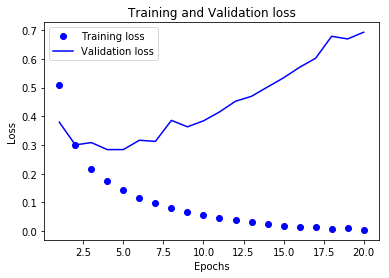

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt

history_dict=history.history

print("history 정보:",history_dict.keys())

loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')              # 파란점
plt.plot(epochs,val_loss,'b',label='Validation loss')         # 파란 실선
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 정확도 그리기

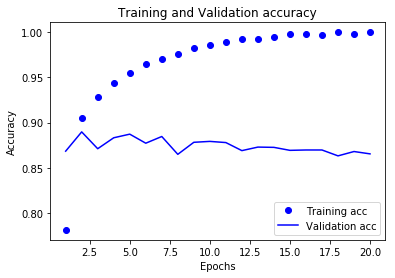

In [19]:
plt.clf() # 그래프 초기화

acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')              # 파란점
plt.plot(epochs,val_acc,'b',label='Validation acc')         # 파란 실선
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델 평가하기

In [20]:
test_loss,test_acc=model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 132us/step


In [21]:
# 84%
test_acc

0.85

# 모델 개선

위의 그래프를 보면 모델이 overfitting이 됐다는 것을 알 수 있다

다양한 방법으로 overfitting을 완화할 수 있다

## 처음부터 다시 (적은 epoch으로 ) 훈련하기 

In [22]:
model=models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512,validation_data=(x_val,y_val))

test_loss,test_acc=model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 163us/step - loss: 0.5326 - acc: 0.7917 - val_loss: 0.4064 - val_acc: 0.8700
Epoch 2/4
15000/15000 [==============================] - 2s 150us/step - loss: 0.3258 - acc: 0.8987 - val_loss: 0.3154 - val_acc: 0.8851
Epoch 3/4
15000/15000 [==============================] - 2s 155us/step - loss: 0.2357 - acc: 0.9245 - val_loss: 0.2827 - val_acc: 0.8899
Epoch 4/4
25000/25000 [==============================] - 3s 128us/step


In [23]:
# 87%
test_acc

0.8772

## 훈련된 모델로 새로운 데이터에 대해 예측하기

In [24]:
model.predict(x_test)

array([[0.33491266],
       [0.9995926 ],
       [0.9345059 ],
       ...,
       [0.1444511 ],
       [0.19112667],
       [0.6551966 ]], dtype=float32)

In [25]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

# 추가 실험

## 1-1. 은닉층 1개 이용 (88.4%)

In [26]:
model=models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512)

test_loss,test_acc=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 107us/step - loss: 0.4913 - acc: 0.7979
Epoch 2/4
15000/15000 [==============================] - 1s 91us/step - loss: 0.3072 - acc: 0.9055
Epoch 3/4
15000/15000 [==============================] - 1s 94us/step - loss: 0.2391 - acc: 0.9247
Epoch 4/4
25000/25000 [==============================] - 3s 129us/step


In [27]:
test_acc

0.88492

## 1-2. 은닉층 3개 이용 (87.4%)

In [28]:
model=models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512)

test_loss,test_acc=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 111us/step - loss: 0.5343 - acc: 0.7840
Epoch 2/4
15000/15000 [==============================] - 1s 97us/step - loss: 0.3229 - acc: 0.9007
Epoch 3/4
15000/15000 [==============================] - 1s 95us/step - loss: 0.2298 - acc: 0.9258
Epoch 4/4
25000/25000 [==============================] - 3s 134us/step


In [29]:
test_acc

0.87448

## 2-1. 은닉 유닉 줄이기 (87.7%)

In [30]:
model=models.Sequential()

model.add(layers.Dense(8,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512)

test_loss,test_acc=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 111us/step - loss: 0.5456 - acc: 0.7619
Epoch 2/4
15000/15000 [==============================] - 1s 93us/step - loss: 0.3478 - acc: 0.8961
Epoch 3/4
15000/15000 [==============================] - 1s 93us/step - loss: 0.2594 - acc: 0.9237
Epoch 4/4
25000/25000 [==============================] - 3s 135us/step


In [31]:
test_acc

0.87756

## 2-2. 은닉 유닉 추가하기 64개 (84.7%)

In [32]:
model=models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512)

test_loss,test_acc=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 117us/step - loss: 0.4837 - acc: 0.7776
Epoch 2/4
15000/15000 [==============================] - 1s 100us/step - loss: 0.2518 - acc: 0.9099
Epoch 3/4
15000/15000 [==============================] - 1s 98us/step - loss: 0.1825 - acc: 0.9355
Epoch 4/4
25000/25000 [==============================] - 4s 140us/step: 


In [33]:
test_acc

0.84752

## 2-2. 은닉 유닉 추가하기 32개 (87.9%)

In [34]:
model=models.Sequential()

model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512)

test_loss,test_acc=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 124us/step - loss: 0.4878 - acc: 0.7739
Epoch 2/4
15000/15000 [==============================] - 1s 95us/step - loss: 0.2773 - acc: 0.9017
Epoch 3/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.2009 - acc: 0.9318
Epoch 4/4
25000/25000 [==============================] - 4s 141us/step


In [35]:
test_acc

0.87976

## 3. 손실 함수 mse로 변경 (88.2%)

In [36]:
model=models.Sequential()

model.add(layers.Dense(8,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512)

test_loss,test_acc=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 110us/step - loss: 0.2180 - acc: 0.6364
Epoch 2/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.1712 - acc: 0.8343
Epoch 3/4
15000/15000 [==============================] - 1s 93us/step - loss: 0.1154 - acc: 0.9087
Epoch 4/4
25000/25000 [==============================] - 3s 126us/step


In [37]:
test_acc

0.88208

## 4. 활성화 함수 tanh로 변경 (87.8%)

In [38]:
model=models.Sequential()

model.add(layers.Dense(8,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(8,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x_data,y_data,epochs=4,batch_size=512)

test_loss,test_acc=model.evaluate(x_test,y_test)

Epoch 1/4
15000/15000 [==============================] - 2s 115us/step - loss: 0.5227 - acc: 0.8015
Epoch 2/4
15000/15000 [==============================] - 1s 94us/step - loss: 0.3511 - acc: 0.8990
Epoch 3/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.2679 - acc: 0.9223
Epoch 4/4
25000/25000 [==============================] - 4s 143us/step


In [39]:
test_acc

0.87884